# explore zillow data <a name='top'></a>

<a href='#hypothesis'>Click here for the five questions to hypothesis test</a> 

*(link will not work in github, but only on local copies of this notebook)*

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import product, combinations

import wrangle_zillow

ALPHA = 0.05

In [2]:
df = wrangle_zillow.wrangle_data()
df.info()

Returning saved csv file.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52291 entries, 0 to 77413
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      52291 non-null  float64
 1   transdate                     52291 non-null  object 
 2   id                            52291 non-null  int64  
 3   parcelid                      52291 non-null  int64  
 4   bathroomcnt                   52291 non-null  float64
 5   bedroomcnt                    52291 non-null  float64
 6   calculatedbathnbr             52252 non-null  float64
 7   calculatedfinishedsquarefeet  52290 non-null  float64
 8   finishedsquarefeet12          52119 non-null  float64
 9   fullbathcnt                   52252 non-null  float64
 10  latitude                      52291 non-null  float64
 11  longitude                     52291 non-null  float64
 12  lotsizesquarefeet             5195

/Users/stephenfitzsimon/codeup-data-science/clustering-exercises/wrangle_zillow.py:38: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(FILENAME).drop(columns = ['Unnamed: 0'])


In [3]:
train, validate, test = wrangle_zillow.split_data(df)
train

,logerror,transdate,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,county
2799,-0.084991,2017-01-13,1244339,12167632,1.0,3.0,1.0,1745.0,1745.0,1.0,...,0.0,1927.0,88963.0,301701.0,2016.0,212738.0,3754.95,6.037460e+13,Single Family Residential,Los Angeles
57105,-0.041340,2017-07-14,2675958,12260585,3.0,4.0,3.0,1729.0,1729.0,3.0,...,0.0,1948.0,128112.0,187643.0,2016.0,59531.0,2542.36,6.037541e+13,Single Family Residential,Los Angeles
27246,0.004583,2017-04-18,787451,14256133,2.5,3.0,2.5,2030.0,2030.0,2.0,...,7.0,1965.0,113342.0,612698.0,2016.0,499356.0,7031.08,6.059076e+13,Single Family Residential,Orange
38137,-0.029900,2017-05-22,630945,11641571,4.0,4.0,4.0,2729.0,2729.0,4.0,...,0.0,1929.0,337435.0,804966.0,2016.0,467531.0,9877.35,6.037261e+13,Single Family Residential,Los Angeles
7698,0.007767,2017-02-03,1270992,11199165,2.0,3.0,2.0,1536.0,1536.0,2.0,...,0.0,1982.0,97000.0,198000.0,2016.0,101000.0,3292.92,6.037911e+13,Single Family Residential,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52550,0.127102,2017-06-30,2377279,12074776,0.0,0.0,NaN,360.0,360.0,NaN,...,0.0,1925.0,4435.0,11089.0,2016.0,6654.0,150.58,6.037301e+13,Single Family Residential,Los Angeles
47410,-0.085309,2017-06-16,975854,12157091,1.0,3.0,1.0,1154.0,1154.0,1.0,...,0.0,1946.0,49747.0,95510.0,2016.0,45763.0,1405.33,6.037461e+13,Single Family Residential,Los Angeles
7635,0.021872,2017-02-02,1614251,11320085,3.0,4.0,3.0,2429.0,2429.0,3.0,...,0.0,1989.0,160000.0,307000.0,2016.0,147000.0,4573.77,6.037901e+13,Single Family Residential,Los Angeles
43934,-0.007939,2017-06-07,2423357,12448668,1.0,2.0,1.0,968.0,968.0,1.0,...,0.0,1929.0,95400.0,350000.0,2016.0,254600.0,4288.97,6.037570e+13,Single Family Residential,Los Angeles


Consider the description of the distributions of the target variable

<AxesSubplot:>

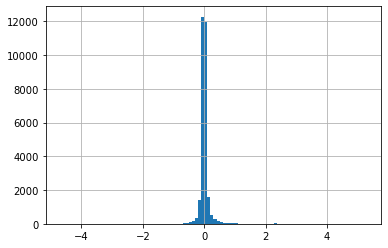

In [4]:
train.logerror.hist(bins = 100)

<AxesSubplot:>

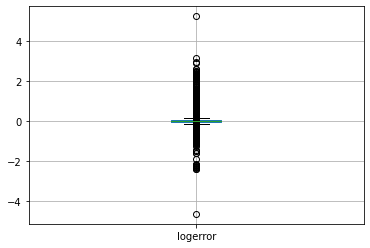

In [5]:
train.boxplot('logerror')

In [6]:
train[['logerror']].describe()

,logerror
count,29282.000000
mean,0.019025
std,0.179496
min,-4.655420
25%,-0.024455
50%,0.007157
75%,0.040806
max,5.262999


There are a lot of outliers.  Most of the error is concentrated very closely to 0.  Median value is basically 0.

### Consider the distributions of the variables

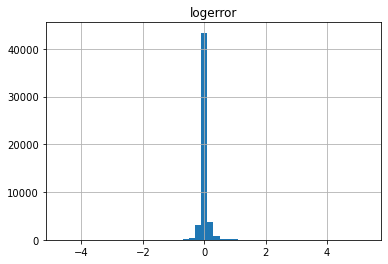

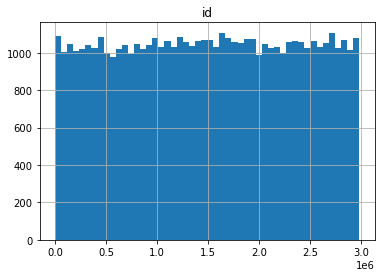

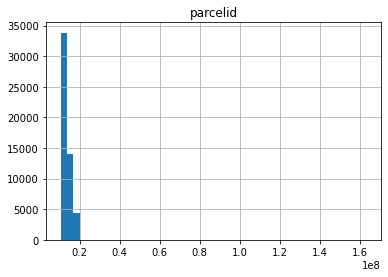

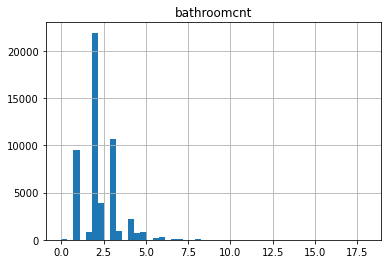

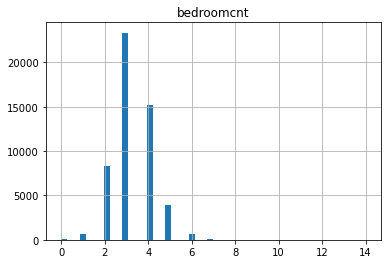

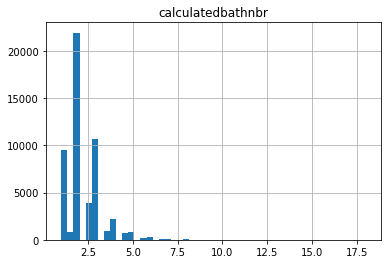

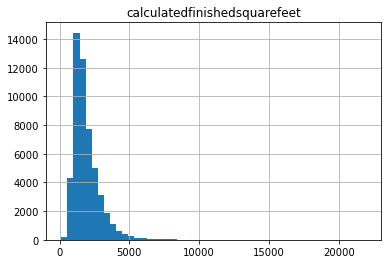

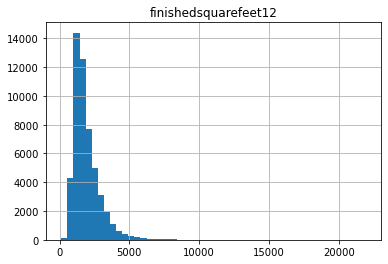

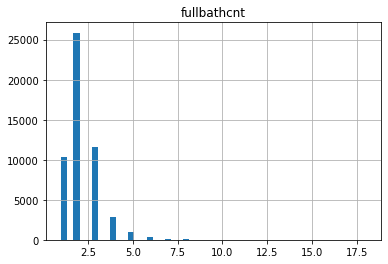

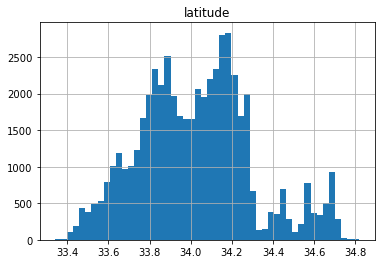

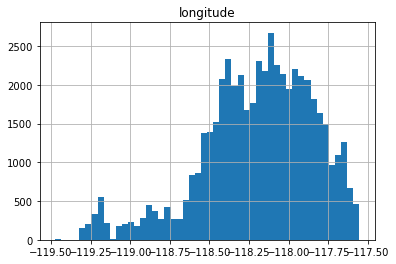

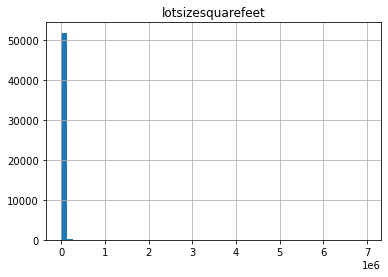

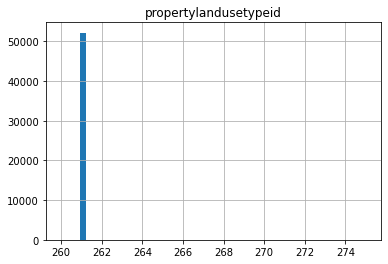

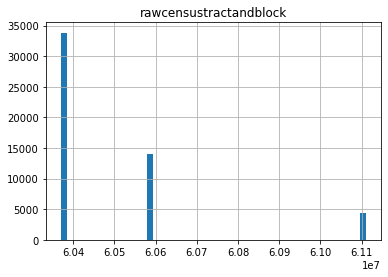

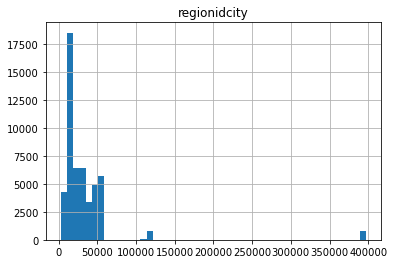

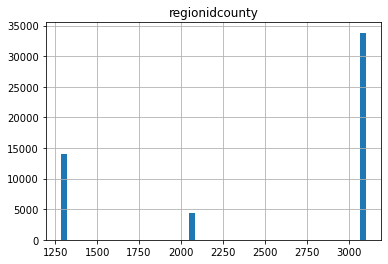

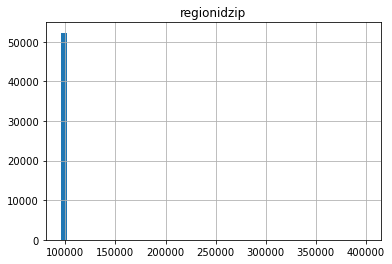

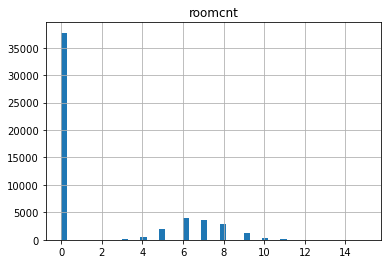

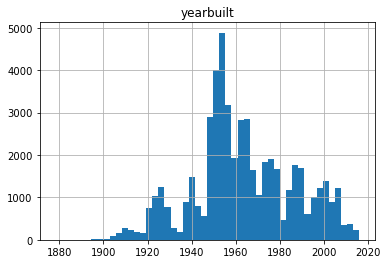

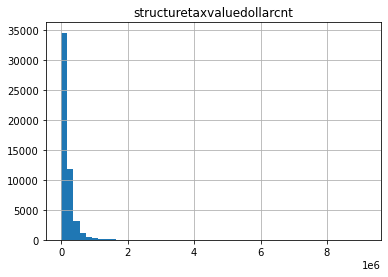

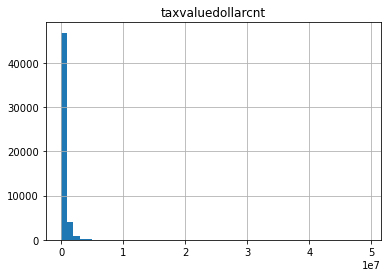

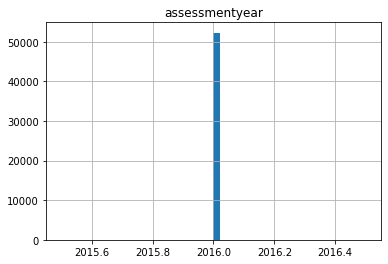

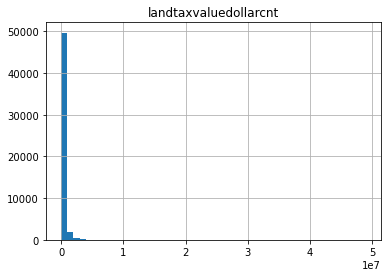

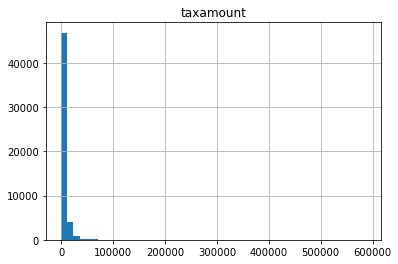

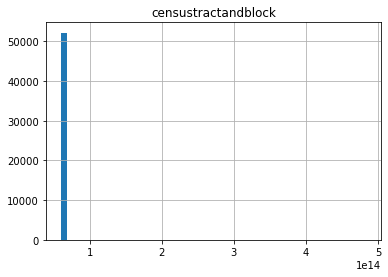

In [7]:
for col in df.select_dtypes(exclude='object').columns.tolist():
    df[col].hist(bins=50)
    plt.title(col)
    plt.show()

A lot are very concentrated around a single value with lots of outliers.  Consider box plots:

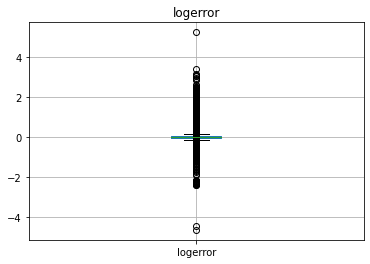

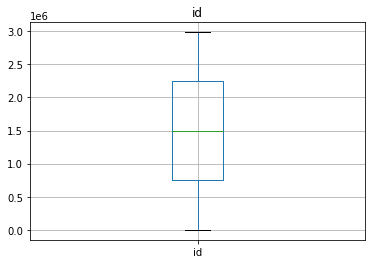

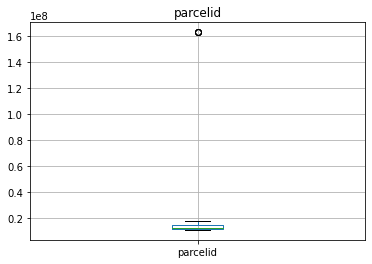

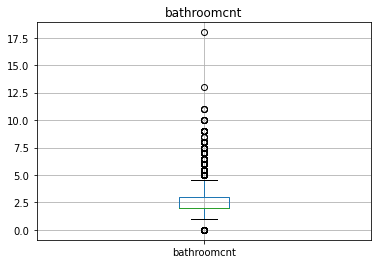

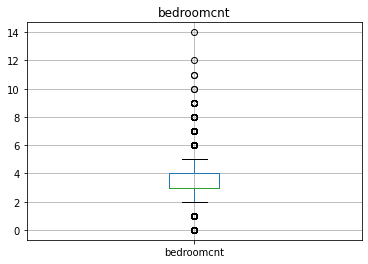

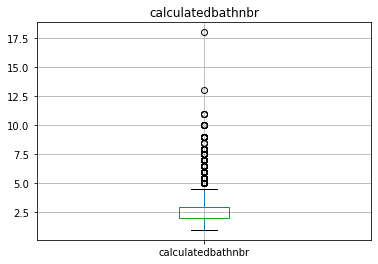

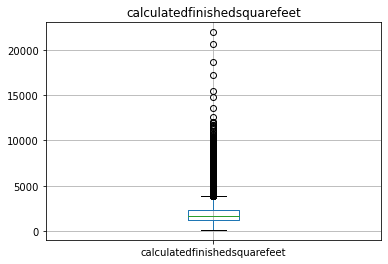

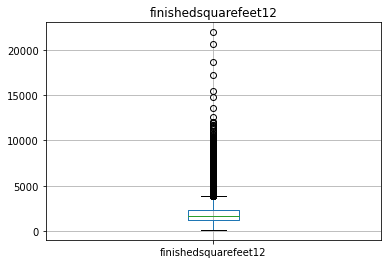

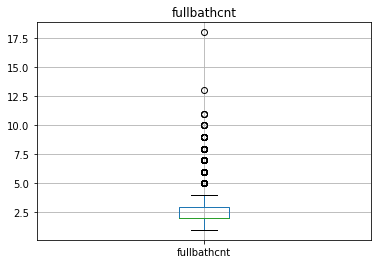

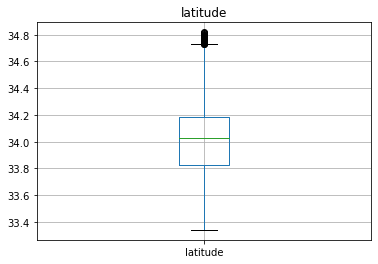

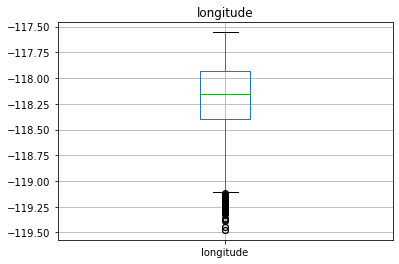

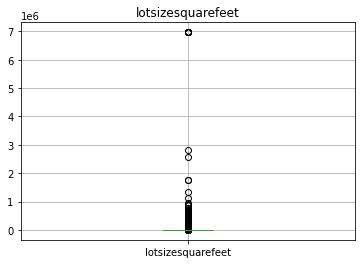

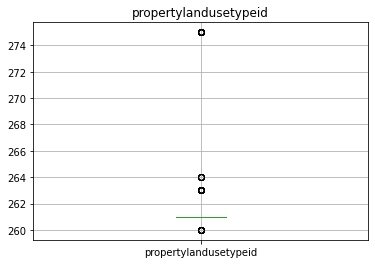

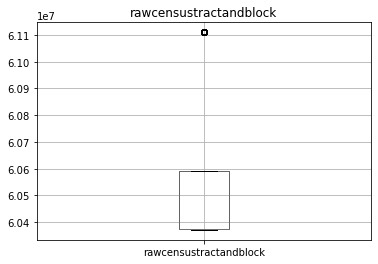

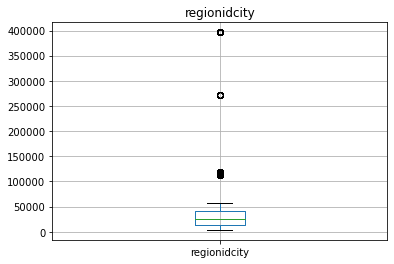

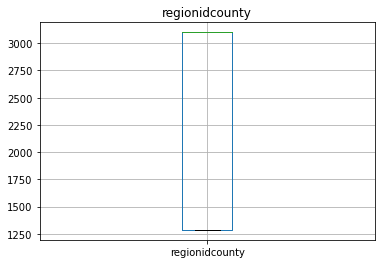

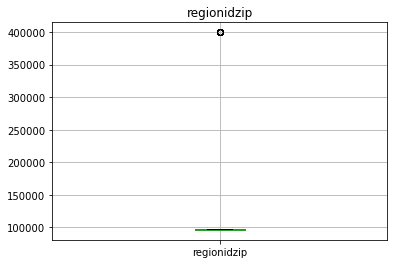

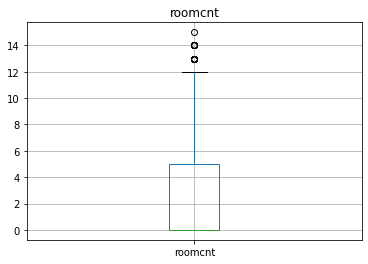

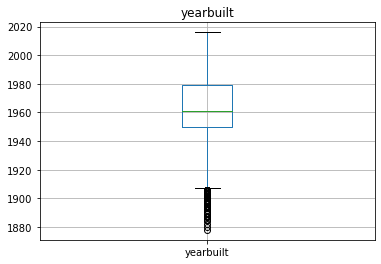

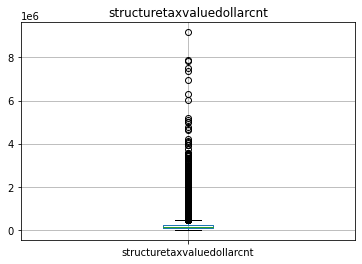

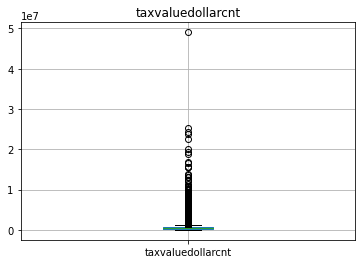

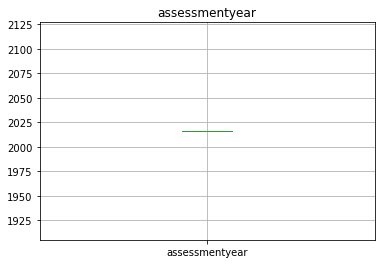

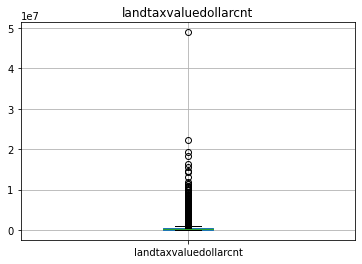

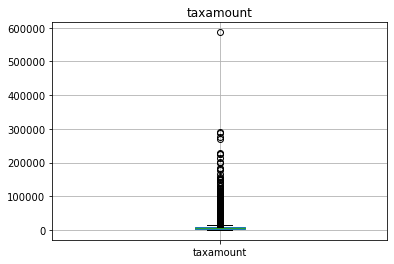

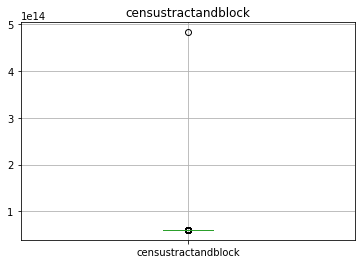

In [8]:
for col in df.select_dtypes(exclude='object').columns.tolist():
    df.boxplot(col)
    plt.title(col)
    plt.show()

Really clear just how many outliers there are in every column.  

### Variables by county

Consider the variables by the county:

In [9]:
train.county.value_counts()

Los Angeles    18908
Orange          7880
Ventura         2494
Name: county, dtype: int64

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_25819/2859780152.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3)


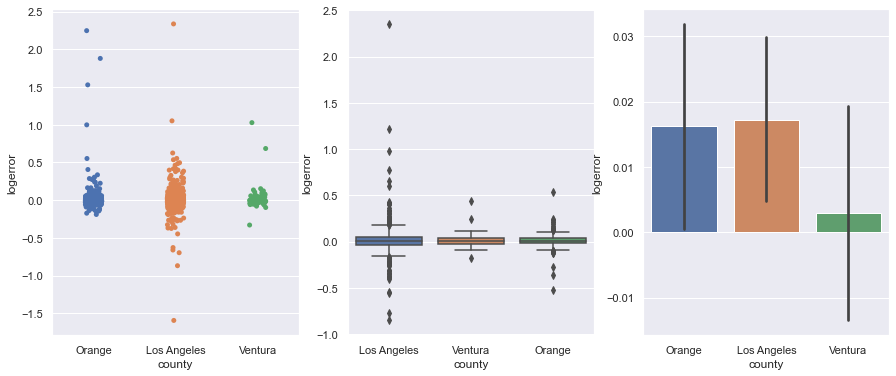

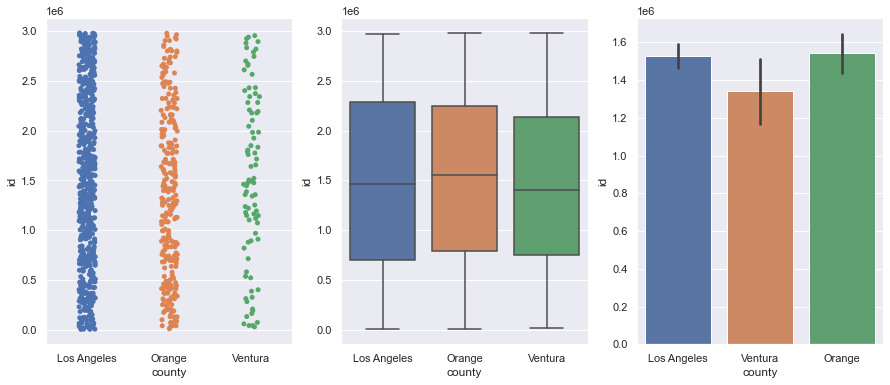

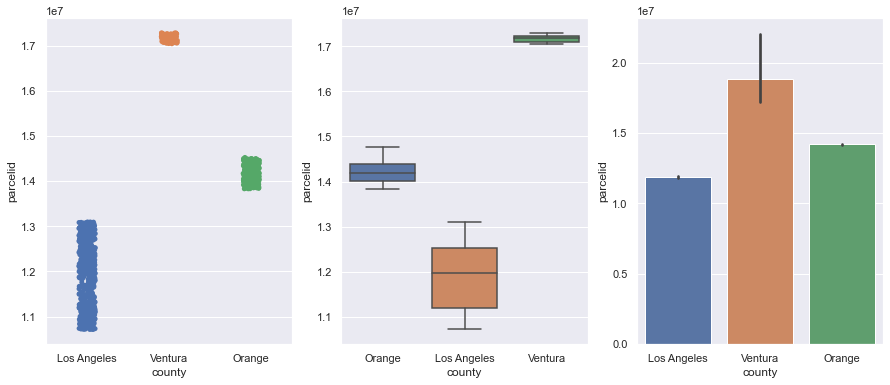

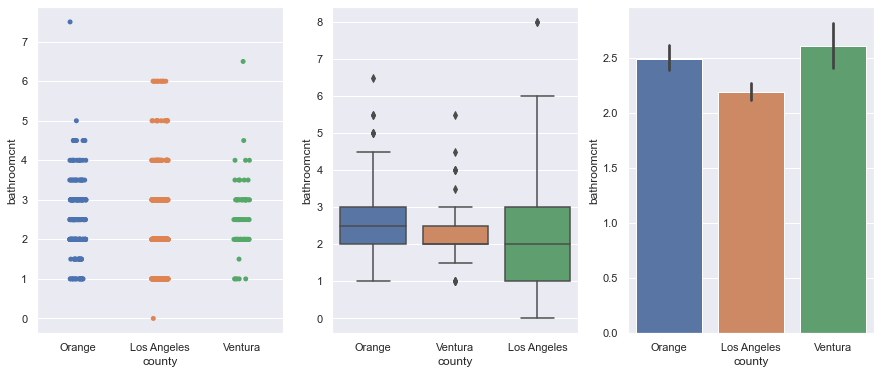

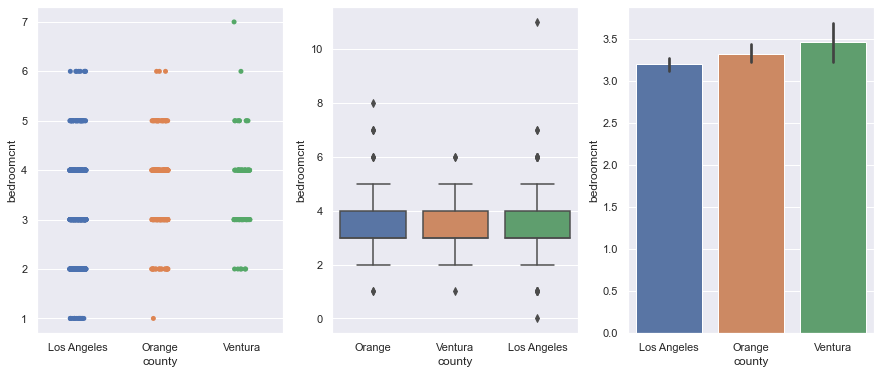

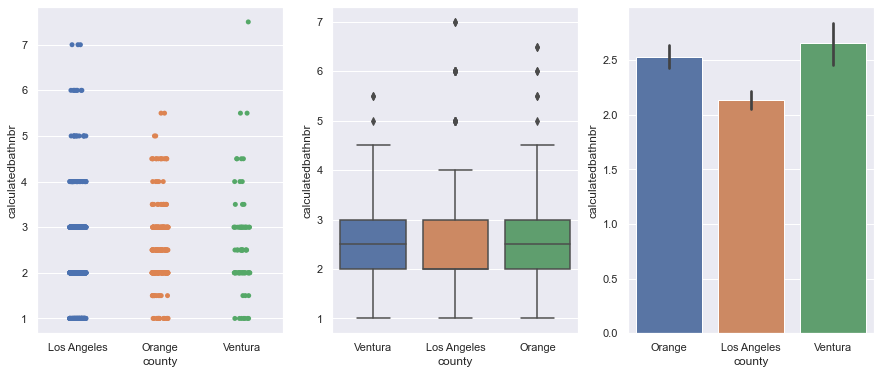

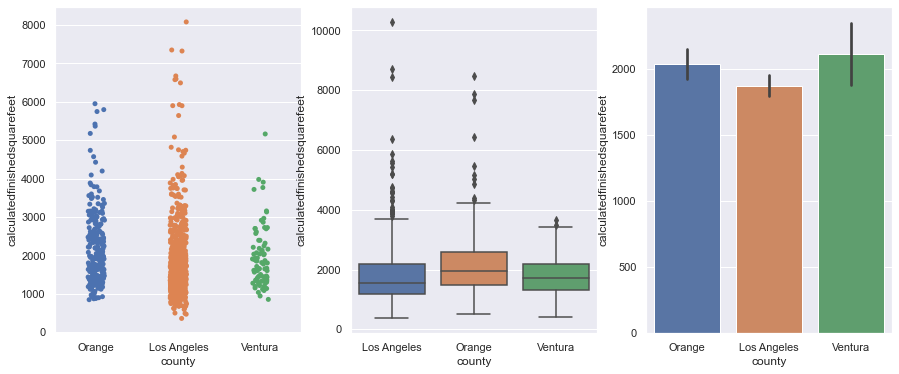

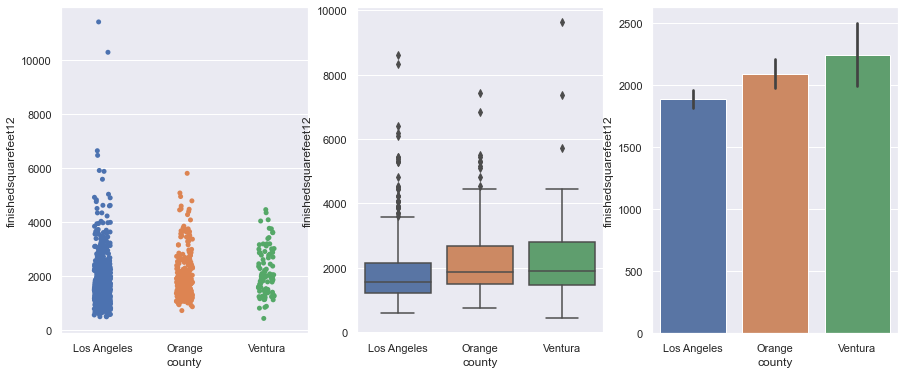

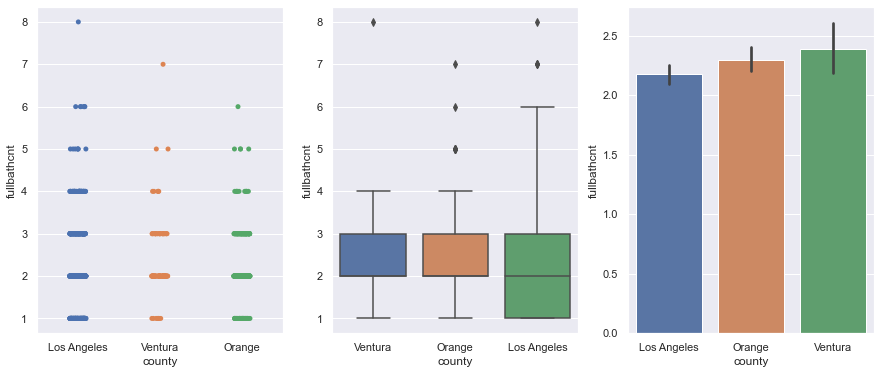

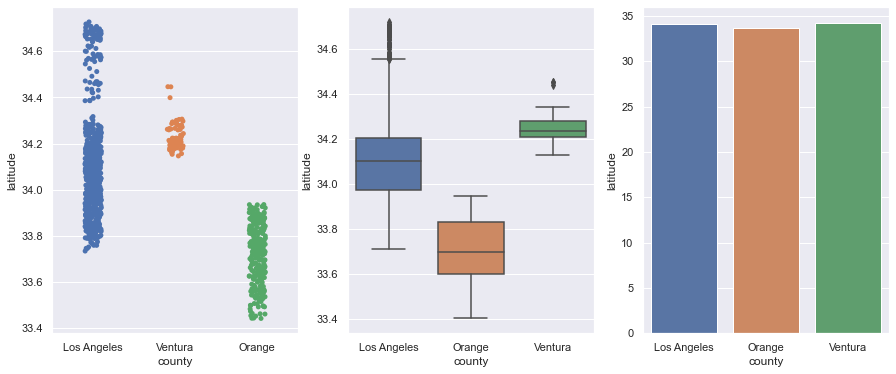

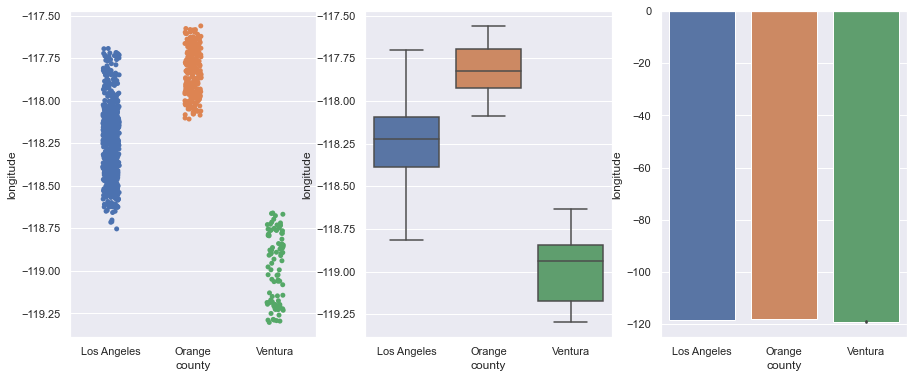

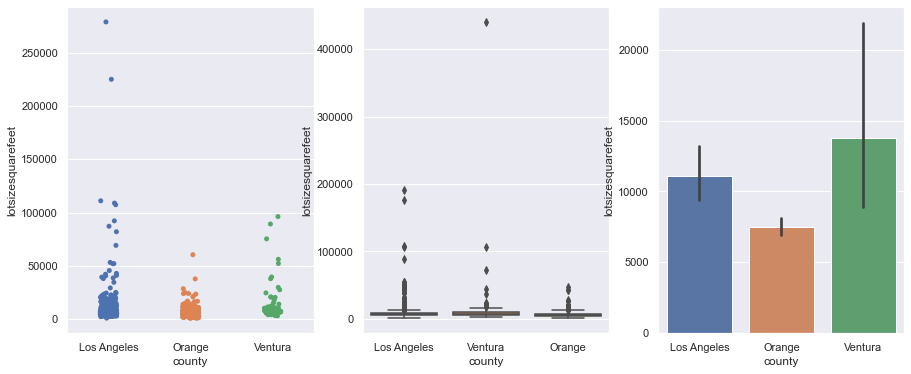

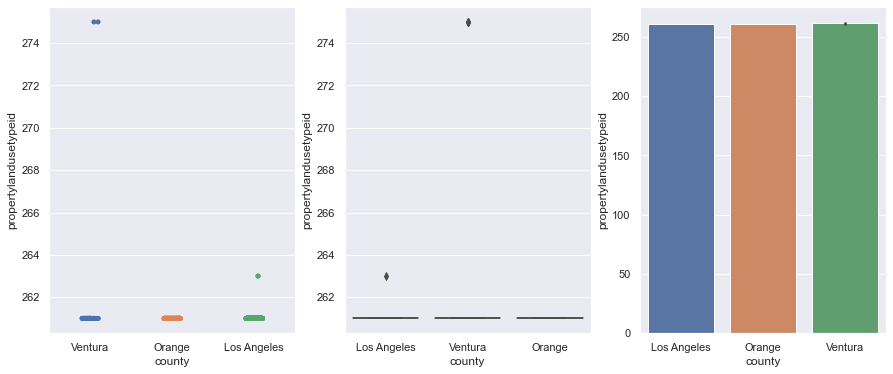

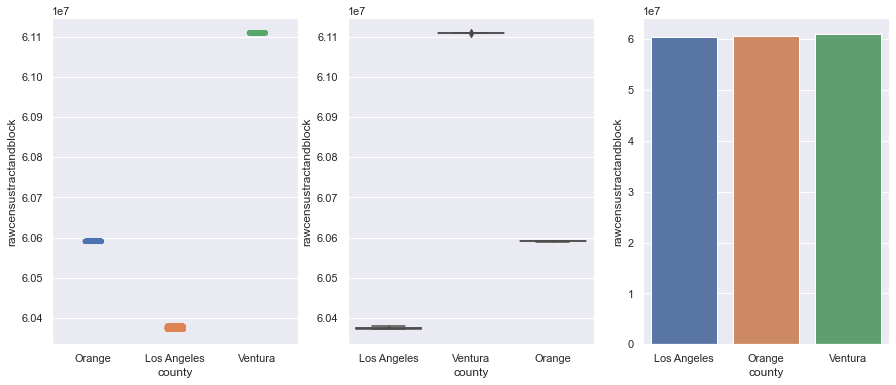

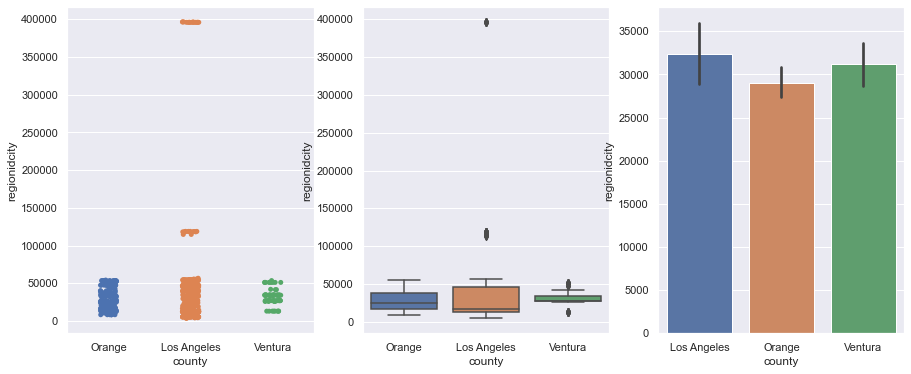

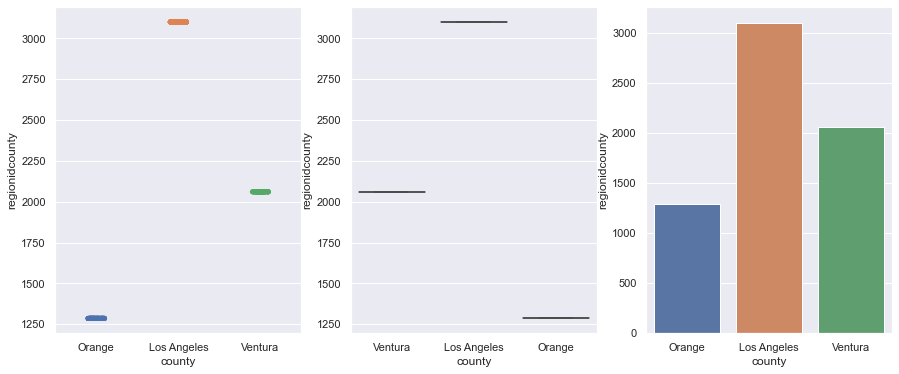

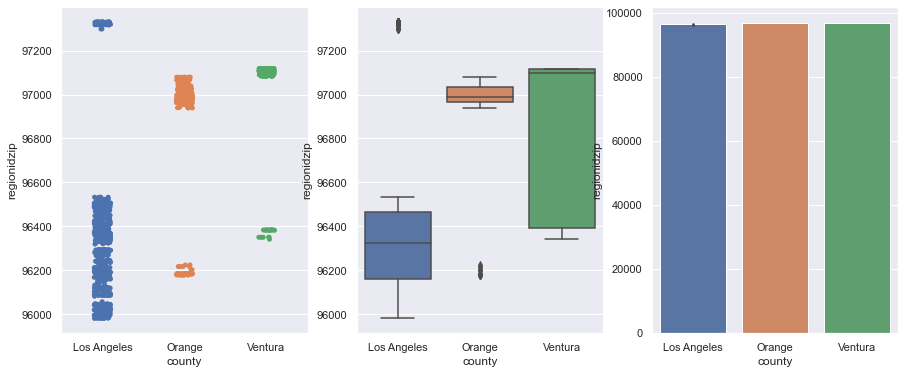

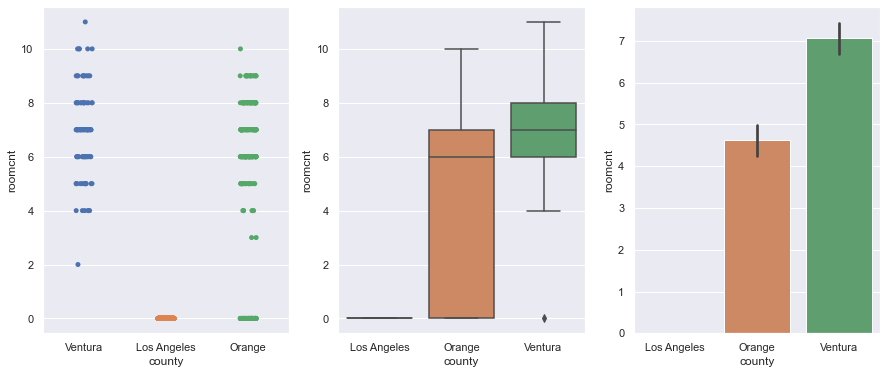

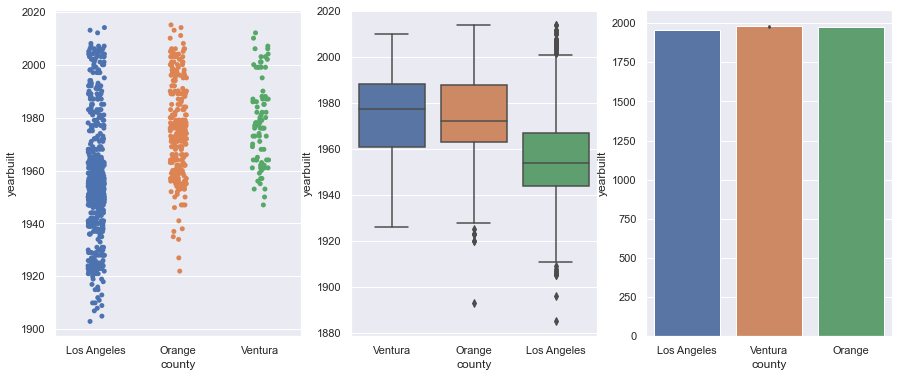

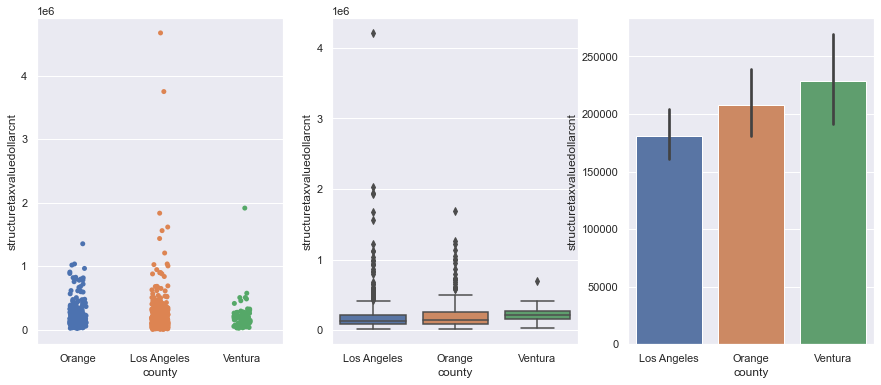

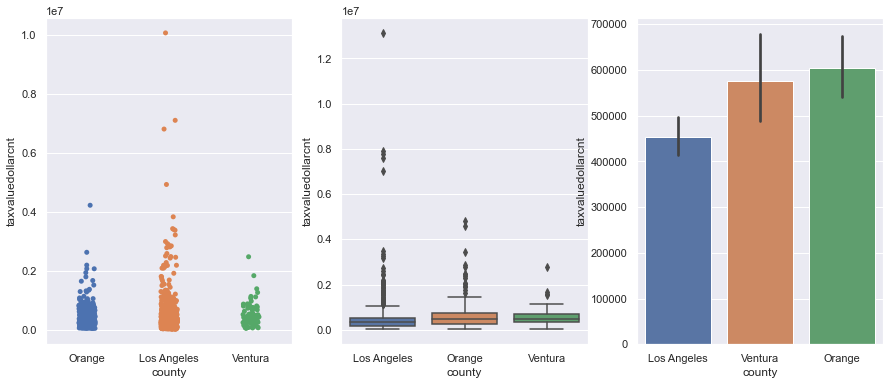

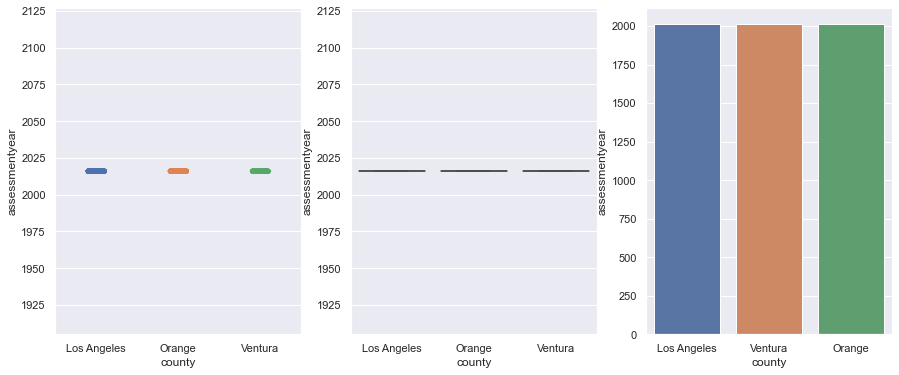

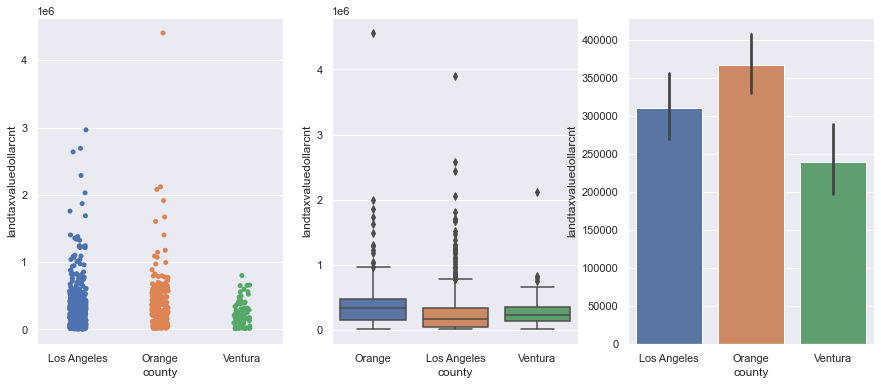

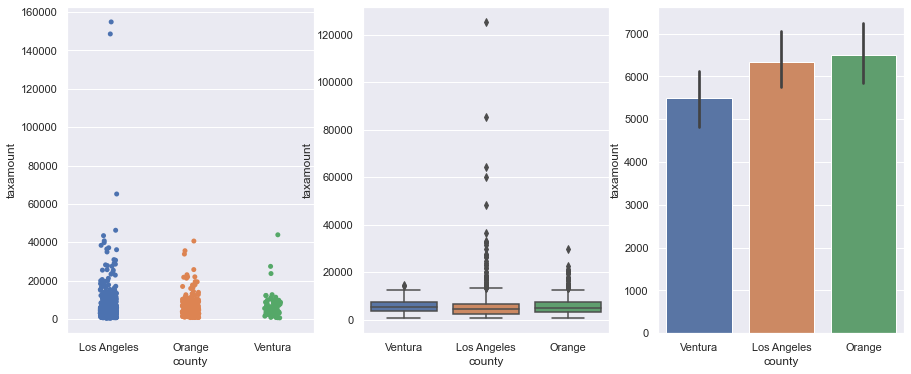

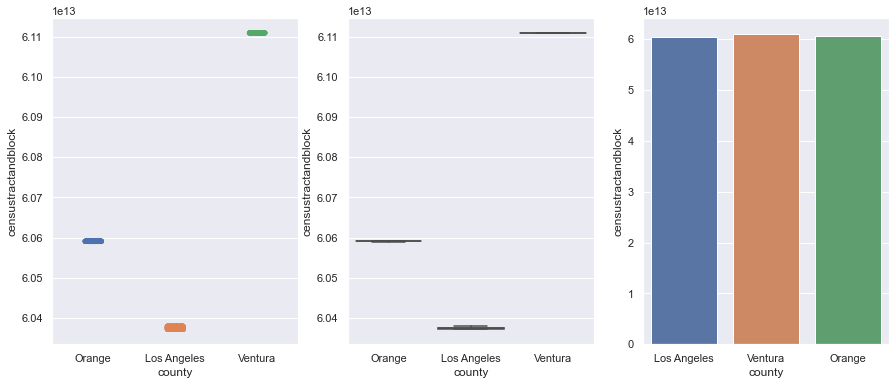

In [10]:
from itertools import product

def plot_categorical_and_continuous_vars(df,
                                         columns_cat,
                                         columns_cont,
                                         sampling = 1000):
    '''plots a strip plot, a box plot, and a barplot for all the combinations passed
    from columns_cat, and columns_cont'''
    #make all the pairs
    pairs = product(columns_cat, columns_cont)
    for pair in pairs:
        #set up for subplots
        sns.set(rc={"figure.figsize":(15, 6)}) 
        fig, axes = plt.subplots(1, 3)
        
        #make the plots 
        sns.stripplot(x=pair[0], y=pair[1], data=df.sample(sampling), ax = axes[0])
        sns.boxplot(x=pair[0], y=pair[1], data=df.sample(sampling), ax = axes[1])
        sns.barplot(x=pair[0], y=pair[1], data=df.sample(sampling), ax = axes[2])
        #plt.
        plt.show
     
plot_categorical_and_continuous_vars(train, columns_cat=['county'], columns_cont=train.select_dtypes(exclude='object').columns.tolist())

In [11]:
train[['latitude', 'longitude']]

,latitude,longitude
2799,34.200182,-118.126998
57105,33.899422,-118.256137
27246,33.748831,-117.827874
38137,34.101106,-118.435429
7698,34.570102,-118.097898
...,...,...
52550,34.188838,-118.224617
47410,34.195665,-118.177696
7635,34.645853,-118.259738
43934,33.877401,-118.179959


## simulating neighborhoods around a point.

consider the latitude and longitude of a point, and then all the points around it.  Then take any column of this subset and do stats on it.

In [12]:
def get_neighbors(df):
    diff = 0.01
    neighbor_means = []
    neighbor_nums = []
    for i, row in df.iterrows():
        condition_1 = (df['latitude'] > row['latitude']- diff)
        condition_2 = (df['latitude'] < row['latitude']+ diff)
        condition_3 = (df['longitude'] > row['longitude']- diff)
        condition_4 = (df['longitude'] < row['longitude']+ diff)
        neighbor_mean = df[condition_1 & condition_2 & condition_3 & condition_4]['taxvaluedollarcnt'].mean()
        neighbor_num = df[condition_1 & condition_2 & condition_3 & condition_4]['taxvaluedollarcnt'].shape[0]
        neighbor_nums.append(neighbor_num)
        neighbor_means.append(neighbor_mean)
    df['neighbor_num'] = neighbor_nums
    df['neighbor_mean'] = neighbor_means
    return df

func_df = get_neighbors(train)

In [13]:
func_df['mean_taxvalue_diff'] = func_df['taxvaluedollarcnt']-func_df['neighbor_mean']
func_df[['taxvaluedollarcnt','latitude', 'longitude', 'neighbor_num', 'neighbor_mean', 'mean_taxvalue_diff']].describe()

,taxvaluedollarcnt,latitude,longitude,neighbor_num,neighbor_mean,mean_taxvalue_diff
count,2.928200e+04,29282.000000,29282.000000,29282.000000,2.928200e+04,2.928200e+04
mean,5.269636e+05,34.024202,-118.193484,29.670378,5.225378e+05,4.425819e+03
std,7.293823e+05,0.274326,0.357673,12.971549,4.646406e+05,5.378277e+05
min,9.242000e+03,33.340851,-119.475265,1.000000,2.682500e+04,-6.539989e+06
25%,1.926102e+05,33.827812,-118.400697,21.000000,2.822136e+05,-1.671710e+05
50%,3.713630e+05,34.027637,-118.150619,29.000000,3.850537e+05,-3.981810e+03
75%,6.185350e+05,34.188021,-117.927089,37.000000,5.918657e+05,1.301082e+05
max,2.434570e+07,34.794327,-117.554636,96.000000,7.774216e+06,2.218187e+07


<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='mean_taxvalue_diff'>

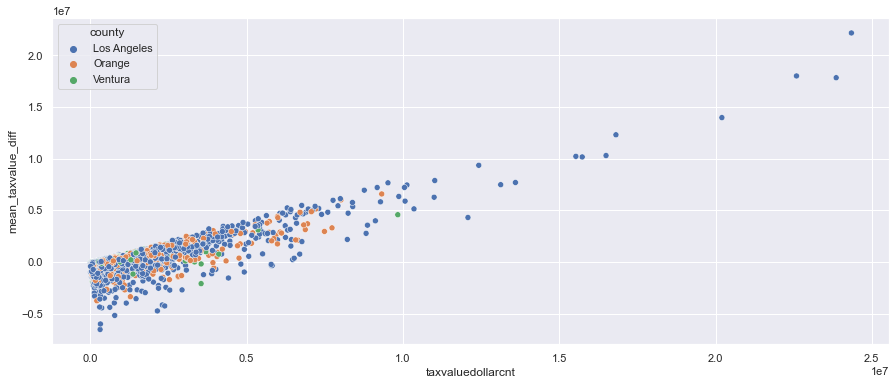

In [14]:
sns.scatterplot(data=func_df, y = 'mean_taxvalue_diff', x = 'taxvaluedollarcnt', hue='county')

Looks like a lot of the error is coming from LA county, which has the highest price homes.

In [15]:
func_df[['mean_taxvalue_diff']].describe()

,mean_taxvalue_diff
count,2.928200e+04
mean,4.425819e+03
std,5.378277e+05
min,-6.539989e+06
25%,-1.671710e+05
50%,-3.981810e+03
75%,1.301082e+05
max,2.218187e+07


The mean error is very low.  0.75 of the errors are $\approx$ 130k

perhaps it is worth checking if the error is generally negative or positive. Consider the houses that are worth less than neighboring houses--these will have a negative `mean_taxvalue_diff`

In [16]:
(func_df['mean_taxvalue_diff'] < 0).mean()

0.5084010655009904

it is split in half.  But consider the error difference:

In [17]:
func_df[(func_df['mean_taxvalue_diff'] < 0)]['mean_taxvalue_diff'].describe()

count    1.488700e+04
mean    -2.407739e+05
std      3.228694e+05
min     -6.539989e+06
25%     -2.833817e+05
50%     -1.638481e+05
75%     -6.876190e+04
max     -9.880000e+00
Name: mean_taxvalue_diff, dtype: float64

In [18]:
func_df[(func_df['mean_taxvalue_diff'] >= 0)]['mean_taxvalue_diff'].describe()

count    1.439500e+04
mean     2.580061e+05
std      5.950858e+05
min      0.000000e+00
25%      5.839694e+04
50%      1.334541e+05
75%      2.543291e+05
max      2.218187e+07
Name: mean_taxvalue_diff, dtype: float64

There is less of an extreme error in houses that are lower than their neighboring houses.  This is a factor of 10; compare the min and max in these tables respectively.

is there a better prediction if the median is used?

In [19]:
def get_neighbors_median(df):
    diff = 0.01
    neighbor_medians = []
    neighbor_nums = []
    for i, row in df.iterrows():
        condition_1 = (df['latitude'] > row['latitude']- diff)
        condition_2 = (df['latitude'] < row['latitude']+ diff)
        condition_3 = (df['longitude'] > row['longitude']- diff)
        condition_4 = (df['longitude'] < row['longitude']+ diff)
        neighbor_median = df[condition_1 & condition_2 & condition_3 & condition_4]['taxvaluedollarcnt'].median()
        neighbor_num = df[condition_1 & condition_2 & condition_3 & condition_4]['taxvaluedollarcnt'].shape[0]
        neighbor_nums.append(neighbor_num)
        neighbor_medians.append(neighbor_median)
    df['neighbor_num'] = neighbor_nums
    df['neighbor_median'] = neighbor_medians
    return df

func_df_median = get_neighbors_median(train)

In [20]:
func_df_median['median_taxvalue_diff'] = func_df_median['taxvaluedollarcnt']-func_df_median['neighbor_median']
func_df_median[['taxvaluedollarcnt', 'neighbor_num', 'neighbor_median', 'median_taxvalue_diff']].describe()

,taxvaluedollarcnt,neighbor_num,neighbor_median,median_taxvalue_diff
count,2.928200e+04,29282.000000,2.928200e+04,2.928200e+04
mean,5.269636e+05,29.670378,4.853864e+05,4.157726e+04
std,7.293823e+05,12.971549,3.761781e+05,5.700008e+05
min,9.242000e+03,1.000000,2.682500e+04,-7.907187e+06
25%,1.926102e+05,21.000000,2.773910e+05,-1.434802e+05
50%,3.713630e+05,29.000000,3.802315e+05,0.000000e+00
75%,6.185350e+05,37.000000,5.681180e+05,1.356526e+05
max,2.434570e+07,96.000000,8.223062e+06,2.267714e+07


Consider the neighbor_median vs neighbor_mean above.  neighbor_median > neighbor_mean; this means there may be a skew per the neighborhood.

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='median_taxvalue_diff'>

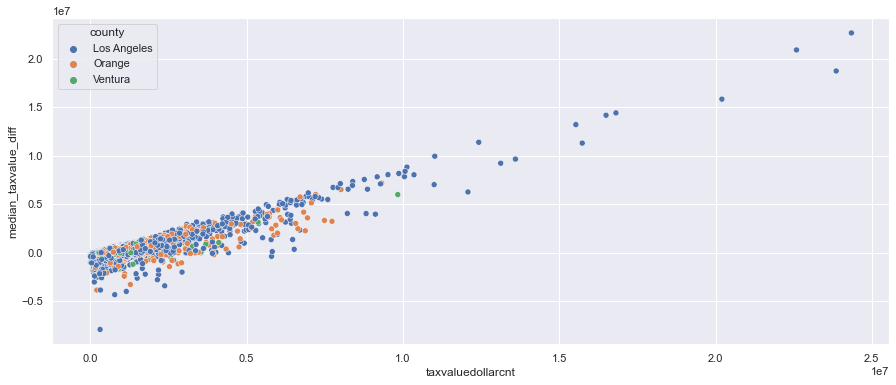

In [21]:
sns.scatterplot(data=func_df_median, y = 'median_taxvalue_diff', x = 'taxvaluedollarcnt', hue='county')

Similar type of error, but maybe more concentrated along a line. i.e. a higher r value

In [22]:
(func_df_median['median_taxvalue_diff'] < 0).mean()

0.48012430844887644

neighborhood median is tending to be higher than the actual value of the particular house.  However, this could just be a statustical anomaly.

Now consider the neighborhood logerror:

In [23]:
def get_neighbors_mean_logerror(df):
    diff = 0.01
    neighbor_means = []
    neighbor_nums = []
    for i, row in df.iterrows():
        condition_1 = (df['latitude'] > row['latitude']- diff)
        condition_2 = (df['latitude'] < row['latitude']+ diff)
        condition_3 = (df['longitude'] > row['longitude']- diff)
        condition_4 = (df['longitude'] < row['longitude']+ diff)
        neighbor_mean = df[condition_1 & condition_2 & condition_3 & condition_4]['logerror'].mean()
        neighbor_num = df[condition_1 & condition_2 & condition_3 & condition_4]['logerror'].shape[0]
        neighbor_nums.append(neighbor_num)
        neighbor_means.append(neighbor_mean)
    df['neighbor_num'] = neighbor_nums
    df['neighbor_mean'] = neighbor_means
    return df

func_df_le = get_neighbors_mean_logerror(train)

In [27]:
func_df_le['mean_logerror_diff'] = func_df_le['logerror'] - func_df_le['neighbor_mean']

<AxesSubplot:xlabel='logerror', ylabel='mean_logerror_diff'>

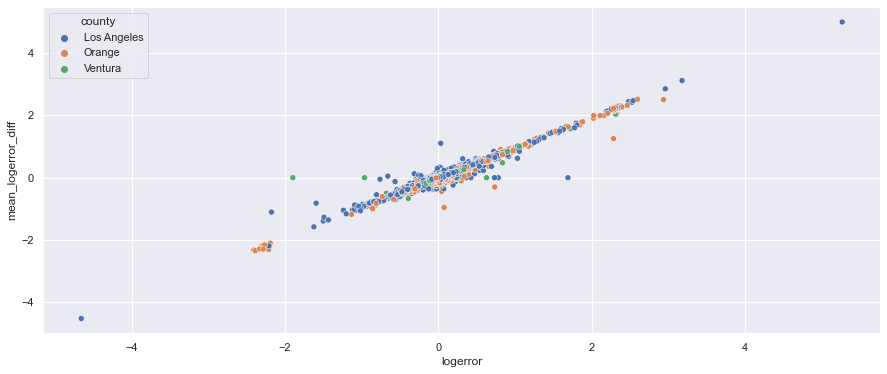

In [32]:
sns.scatterplot(data=func_df_le, y = 'mean_logerror_diff', x = 'logerror', hue='county')

# Formal questions and hypothesis testing <a name='hypothesis'></a>

<a href='#top'>Back to top</a>

## is log error different in each county?

In [39]:
def t_test_by_cat(df,
                columns_cat=['county'],
                columns_cont=['logerror'],
                alpha = 0.05
                ):
    '''Performs a t-test for all subcategories of columns_cat and paored with every column in columns cat
    returns results as a dataframe'''
    outputs = []
    pairs_by_cat = {}
    #get pairs for every sub_Cat
    for category in columns_cat:
        #get subcategory names
        subcats = df[category].unique().tolist()
        #make the pairs
        pairs = list(product(subcats, columns_cont))
        pairs_by_cat[category] = pairs
    for category in columns_cat:
        pairs = pairs_by_cat[category]
        for pair in pairs:
            #subset into county_x and not county_x
            category_x = df[df[category] == pair[0]][pair[1]]
            not_category_x = df[~(df[category] == pair[0])][pair[1]].mean()
            #do the stats test
            t, p = stats.ttest_1samp(category_x, not_category_x)
            output = {
                'category_name':pair[0],
                'column_name':pair[1],
                'p-value':p,
                'reject_null': p < alpha
            }
            outputs.append(output)
    #return as a dataframe
    return pd.DataFrame(outputs)

t_test_by_cat(train)

,category_name,column_name,p,reject_null
0,Los Angeles,logerror,4.672582e-14,True
1,Orange,logerror,4.577805e-07,True
2,Ventura,logerror,3.874181e-01,False


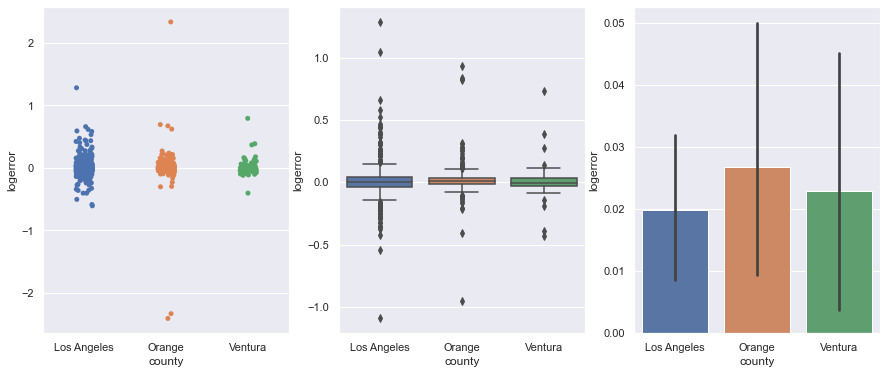

In [40]:
plot_categorical_and_continuous_vars(train, columns_cat=['county'], columns_cont=['logerror'])

Looks like log error is not the same for los angeles and orange county.  From previous project, test if the log error is greater in orange county

In [48]:
def t_test_greater(df, column_cat = 'county', subcat_val = 'Orange', column_cont = 'logerror', alpha = 0.05):
    category_x = df[df[column_cat] == subcat_val][column_cont]
    not_category_x = df[~(df[column_cat] == subcat_val)][column_cont].mean()
    t, p = stats.ttest_1samp(category_x, not_category_x)
    output = {
        'category_name':column_cat,
        'category_value':subcat_val,
        'p-value':p,
        'reject_null': p/2 < alpha
    }
    return pd.DataFrame([output])

t_test_greater(train)

,category_name,category_value,p,reject_null
0,county,Orange,4.577805e-07,True


Looks like Orange county has a greater mean logerror.  This might be the two extreme outliers. Investigate this later.

## Are logerror and taxvaluedollarcnt correlated?

In [50]:
def correlation_tester(df, x, y, alpha=0.05):
    corr, p = stats.pearsonr(df[x], df[y])
    output = {
        'column_x': x,
        'column_y': y,
        'correlation':corr,
        'p-value':p,
        'reject_null':p < alpha
    }
    return pd.DataFrame([output])

correlation_tester(train, 'logerror', 'taxvaluedollarcnt')

,column_x,column_y,correlation,p-value,reject_null
0,taxvaluedollarcnt,logerror,0.001519,0.794918,False


## are logerror and latitude/longitude correlated?

In [57]:
def r_values_vars(df,
                columns):
    '''performs a correlation test for all pairs of columns passed
    returns a dataframe with results'''
    #make all the pairs
    pairs = combinations(columns, 2)
    outputs = []
    #perform a pearson r test on all the pairs
    for pair in pairs:
        #perform the test
        corr, p = stats.pearsonr(df[pair[0]], df[pair[1]])
        #store the output
        output = {
            'correlation':f"{pair[0]} x {pair[1]}",
            'r' : corr,
            'p-value' : p,
            'reject_null' : p < ALPHA
        }
        outputs.append(output)
    # return the results
    corr_tests = pd.DataFrame(outputs)
    return corr_tests

cols_to_corr = ['logerror','latitude', 'longitude']
r_values_vars(train[cols_to_corr].dropna() , columns = cols_to_corr).sort_values('r')

,correlation,r,p-value,reject_null
2,latitude x longitude,-0.546301,0.000000,True
0,logerror x latitude,-0.019684,0.000756,True
1,logerror x longitude,0.021417,0.000247,True


They are correlated, but not in a strong way.

<AxesSubplot:xlabel='longitude', ylabel='logerror'>

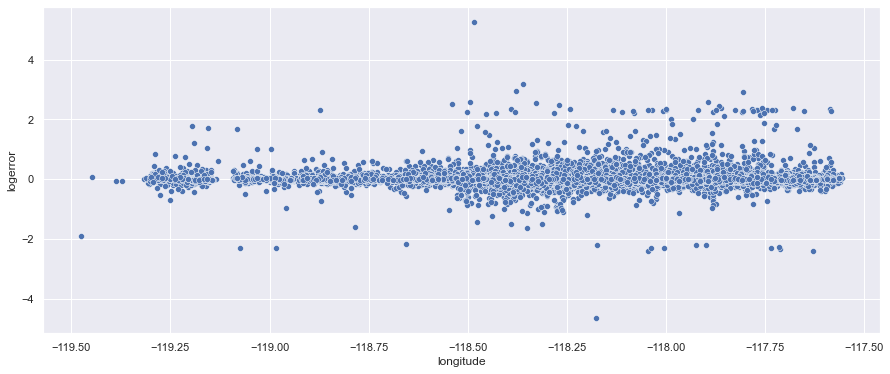

In [58]:
sns.scatterplot(data=train, x='longitude', y='logerror')

## is logerror correlated with the geography?

map the points and hue by logerror

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

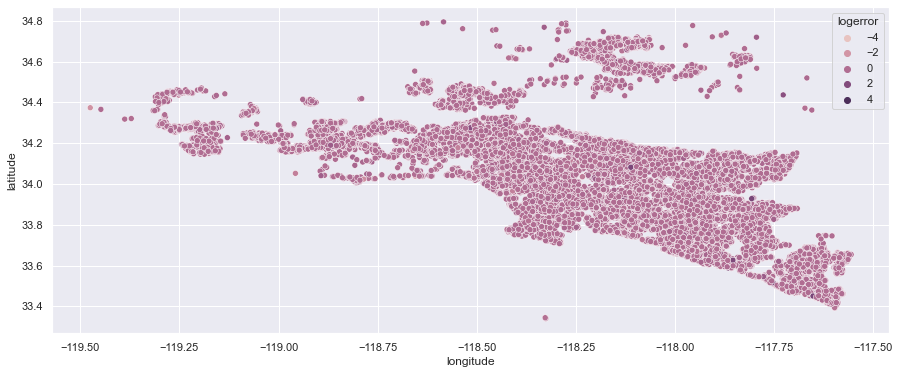

In [61]:
sns.scatterplot(data=train, y='latitude',x='longitude', hue='logerror')

<AxesSubplot:xlabel='logerror'>

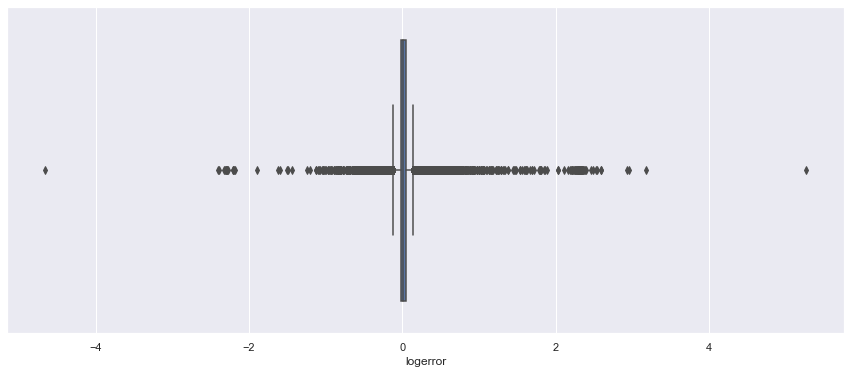

In [95]:
sns.boxplot(data=train, x='logerror')

Consider all the logerrors outside of the IQR.  Label these as 'high log error'.

In [99]:
def return_iqr_tuple(df, column):
    upper_limit = df[column].describe()['75%']
    lower_limit = df[column].describe()['25%']
    return (lower_limit, upper_limit)

#get IQR values
lower_err, upper_err = return_iqr_tuple(train, 'logerror')
train['high_logerror'] = (train.logerror < lower_err) | (train.logerror > upper_err)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

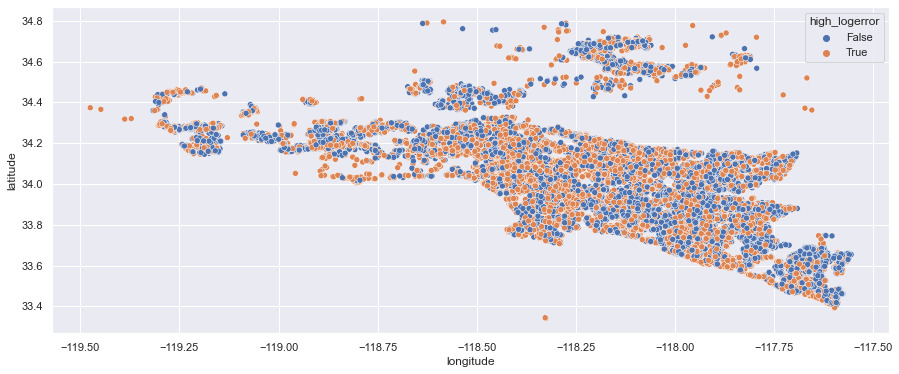

In [100]:
#false -> outside of the IQR
sns.scatterplot(data=train, y='latitude',x='longitude', hue='high_logerror')